In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from Utilities.get_image_data import load_data
from Utilities.form_train_val_test_batches import form_train_val_test_batches
from Utilities.NN_FC_layerwise import FCLayerwise
from Utilities.Net import Final_Network
from Utilities.create_data import create_new
from Utilities.loss_and_accuracies import data_loss_classification, accuracy_classification
from Utilities.manifold_regularization import manifold_classification
from Utilities.optimize_layerwise import optimize
from Utilities.additive_output import net_output 
from Utilities.plot_and_save_figures_layerwise import plot_fig
from joblib import Parallel, delayed
import multiprocessing
import random

In [2]:
from decimal import Decimal # for filenames

import pdb #Equivalent of keyboard in MATLAB, just add "pdb.set_trace()"

import os
import sys

In [3]:
###############################################################################
#                       HyperParameters and RunOptions                        #
###############################################################################
class Hyperparameters:
    max_hidden_layers = 6 # For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  = 20 
    activation        = 'elu'
    classification_act= 'softmax'
    regularization    = 0.001
    manifold          = 0.007
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 1000
    num_epochs        = 100
    
    num_networks      = 6
    

In [4]:
class Hyperparameters_new:
    max_hidden_layers = 3 # For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  = 20
    activation        = 'elu'
    classification_act= 'linear'
    regularization    = 0.000
    manifold          = 0.000
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 1000
    num_epochs        = 200

In [5]:
class RunOptions:
    def __init__(self):    
        #=== Choose Which GPU to Use ===#
        self.which_gpu = '1'
        
        #=== Use L_1 Regularization ===#
        self.use_L1 = 1
        
        #=== Choose Data Set ===#
        self.data_MNIST = 1
        self.data_CIFAR10 = 0 
        self.data_CIFAR100 = 0
        
        #=== Random Seed ===#
        self.random_seed = 1234


In [6]:
###############################################################################
#                                 File Paths                                  #
###############################################################################         
class FilePaths():    
    def __init__(self, hyperp, run_options):  
        #=== Declaring File Name Components ===# 
        self.NN_type = 'FC'
        if run_options.data_MNIST == 1:
            self.dataset = 'MNIST'
        if run_options.data_CIFAR10 == 1:
            self.dataset = 'CIFAR10'
        if run_options.data_CIFAR100 == 1:
            self.dataset = 'CIFAR100'
        if hyperp.regularization >= 1:
            hyperp.regularization = int(hyperp.regularization)
            regularization_string = str(hyperp.regularization)
        else:
            regularization_string = str(hyperp.regularization)
            regularization_string = 'pt' + regularization_string[2:]                        
        node_TOL_string = str('%.2e' %Decimal(hyperp.node_TOL))
        node_TOL_string = node_TOL_string[-1]
        error_TOL_string = str('%.2e' %Decimal(hyperp.error_TOL))
        error_TOL_string = error_TOL_string[-1]
        
        #=== File Name ===#
        if run_options.use_L1 == 0:
            self.filename = self.dataset + '_' + self.NN_type + '_mhl%d_hl%d_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)
        else:
            self.filename = self.dataset + '_' + self.NN_type + '_L1_mhl%d_hl%d_r%s_nTOL%s_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, regularization_string, node_TOL_string, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)

        #=== Saving Trained Neural Network and Tensorboard ===#
        #self.NN_savefile_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Trained_NNs/' + self.filename # Since we need to save four different types of files to save a neural network model, we need to create a new folder for each model
        self.NN_savefile_directory =  self.filename
        self.NN_savefile_name = self.NN_savefile_directory + '/' + self.filename # The file path and name for the four files
        #self.tensorboard_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Tensorboard/' + self.filename

###############################################################################



Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
ListWrapper([784, 20, 20, 10])
Beginning Training
            Epoch 0            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Model: "fc_layerwise"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
W2 (Dense)                   multiple                  420       
_________________________________________________________________
upsampling_layer (Dense)     multiple                  15700     
_________________________________________________________________
classification_layer (Dense) multiple                  210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Time per Batch: 0.13
Time per Epoch: 3.87

Training Set: Loss: 2.293e+00, Accuracy: 0.000
Va

Time per Batch: 0.06
Time per Epoch: 3.61

Training Set: Loss: 2.296e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.113

Previous Layer Relative # of 0s: 0.0000000

            Epoch 17            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.57

Training Set: Loss: 2.296e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.113

Previous Layer Relative # of 0s: 0.0000000

            Epoch 18            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.53

Training Set: Loss: 2.295e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.113

Previous Layer Relative # of 0s: 0.000000

Time per Epoch: 3.66

Training Set: Loss: 2.193e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.360

Previous Layer Relative # of 0s: 0.0000000

            Epoch 35            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.90

Training Set: Loss: 2.177e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.360

Previous Layer Relative # of 0s: 0.0000000

            Epoch 36            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.63

Training Set: Loss: 2.158e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.410

Previous Layer Relative # of 0s: 0.0000000

            Epoch 

Time per Batch: 0.06
Time per Epoch: 3.64

Training Set: Loss: 1.696e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.575

Previous Layer Relative # of 0s: 0.0000000

            Epoch 54            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.75

Training Set: Loss: 1.667e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.568

Previous Layer Relative # of 0s: 0.0000000

            Epoch 55            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.65

Training Set: Loss: 1.645e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.576

Previous Layer Relative # of 0s: 0.000000

Time per Epoch: 3.66

Training Set: Loss: 1.323e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.725

Previous Layer Relative # of 0s: 0.0000000

            Epoch 72            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.75

Training Set: Loss: 1.311e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.671

Previous Layer Relative # of 0s: 0.0000000

            Epoch 73            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.71

Training Set: Loss: 1.301e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.683

Previous Layer Relative # of 0s: 0.0000000

            Epoch 

Time per Batch: 0.06
Time per Epoch: 3.75

Training Set: Loss: 1.124e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.740

Previous Layer Relative # of 0s: 0.0000000

            Epoch 91            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.63

Training Set: Loss: 1.113e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.686

Previous Layer Relative # of 0s: 0.0000000

            Epoch 92            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.71

Training Set: Loss: 1.106e+00, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.755

Previous Layer Relative # of 0s: 0.000000

Time per Batch: 0.06
Time per Epoch: 3.92

Training Set: Loss: 8.346e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.829

Previous Layer Relative # of 0s: 0.0619048

            Epoch 7            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.84

Training Set: Loss: 8.330e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.834

Previous Layer Relative # of 0s: 0.0619048

            Epoch 8            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 4.15

Training Set: Loss: 8.228e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.835

Previous Layer Relative # of 0s: 0.0619048


Time per Batch: 0.06
Time per Epoch: 3.90

Training Set: Loss: 7.435e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.856

Previous Layer Relative # of 0s: 0.0619048

            Epoch 26            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.85

Training Set: Loss: 7.382e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.852

Previous Layer Relative # of 0s: 0.0619048

            Epoch 27            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.08

Training Set: Loss: 7.340e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.856

Previous Layer Relative # of 0s: 0.061904

Time per Epoch: 3.88

Training Set: Loss: 6.840e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.865

Previous Layer Relative # of 0s: 0.0619048

            Epoch 44            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
Time per Epoch: 3.98

Training Set: Loss: 6.802e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.864

Previous Layer Relative # of 0s: 0.0619048

            Epoch 45            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 3.89

Training Set: Loss: 6.775e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.864

Previous Layer Relative # of 0s: 0.0619048

            Epoch 

Time per Batch: 0.06
Time per Epoch: 3.87

Training Set: Loss: 6.404e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.868

Previous Layer Relative # of 0s: 0.0619048

            Epoch 63            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 3.91

Training Set: Loss: 6.382e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.868

Previous Layer Relative # of 0s: 0.0619048

            Epoch 64            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 3.94

Training Set: Loss: 6.356e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.867

Previous Layer Relative # of 0s: 0.061904

Time per Epoch: 3.89

Training Set: Loss: 6.125e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.870

Previous Layer Relative # of 0s: 0.0619048

            Epoch 81            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 3.98

Training Set: Loss: 6.118e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.870

Previous Layer Relative # of 0s: 0.0619048

            Epoch 82            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 3
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 3.95

Training Set: Loss: 6.079e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.869

Previous Layer Relative # of 0s: 0.0619048

            Epoch 

Time per Batch: 0.07
Time per Epoch: 4.10

Training Set: Loss: 5.849e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.870

Previous Layer Relative # of 0s: 0.0619048

     Extending Architecture     
Previous Layer Relative # of 0s: 0.1976190

Beginning Training
            Epoch 0            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Model: "fc_layerwise"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
W2 (Dense)                   multiple                  420       
_________________________________________________________________
W3 (Dense)                   multiple                  420       
_________________________________________________________________
W4 (Dense)                   multiple                  420       
_________________________________

Time per Batch: 0.07
Time per Epoch: 4.25

Training Set: Loss: 4.785e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.873

Previous Layer Relative # of 0s: 0.1976190

            Epoch 16            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.40

Training Set: Loss: 4.800e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.873

Previous Layer Relative # of 0s: 0.1976190

            Epoch 17            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.22

Training Set: Loss: 4.792e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.874

Previous Layer Relative # of 0s: 0.197619

Time per Epoch: 4.23

Training Set: Loss: 4.734e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.1976190

            Epoch 34            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.18

Training Set: Loss: 4.738e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.1976190

            Epoch 35            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.18

Training Set: Loss: 4.711e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.1976190

            Epoch 

Time per Batch: 0.08
Time per Epoch: 4.18

Training Set: Loss: 4.703e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.876

Previous Layer Relative # of 0s: 0.1976190

            Epoch 53            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.19

Training Set: Loss: 4.720e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.876

Previous Layer Relative # of 0s: 0.1976190

            Epoch 54            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.22

Training Set: Loss: 4.682e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.876

Previous Layer Relative # of 0s: 0.197619

Time per Epoch: 4.33

Training Set: Loss: 4.662e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.876

Previous Layer Relative # of 0s: 0.1976190

            Epoch 71            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.29

Training Set: Loss: 4.661e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.1976190

            Epoch 72            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.40

Training Set: Loss: 4.656e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.1976190

            Epoch 

Time per Batch: 0.07
Time per Epoch: 4.42

Training Set: Loss: 4.660e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.876

Previous Layer Relative # of 0s: 0.1976190

            Epoch 90            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.38

Training Set: Loss: 4.660e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.1976190

            Epoch 91            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 4
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
Time per Epoch: 4.29

Training Set: Loss: 4.654e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.197619

Time per Batch: 0.08
Time per Epoch: 4.59

Training Set: Loss: 4.245e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 6            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.66

Training Set: Loss: 4.254e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.876

Previous Layer Relative # of 0s: 0.3261905

            Epoch 7            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.46

Training Set: Loss: 4.206e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.874

Previous Layer Relative # of 0s: 0.3261905


Time per Batch: 0.08
Time per Epoch: 4.59

Training Set: Loss: 4.222e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 25            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.63

Training Set: Loss: 4.226e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 26            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.48

Training Set: Loss: 4.231e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.326190

Time per Epoch: 4.52

Training Set: Loss: 4.269e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 43            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.61

Training Set: Loss: 4.282e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.876

Previous Layer Relative # of 0s: 0.3261905

            Epoch 44            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.53

Training Set: Loss: 4.252e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 

Time per Batch: 0.08
Time per Epoch: 4.50

Training Set: Loss: 4.245e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 62            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.68

Training Set: Loss: 4.288e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 63            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.62

Training Set: Loss: 4.272e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.326190

Time per Epoch: 4.43

Training Set: Loss: 4.288e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 80            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.79

Training Set: Loss: 4.291e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.876

Previous Layer Relative # of 0s: 0.3261905

            Epoch 81            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.53

Training Set: Loss: 4.295e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

            Epoch 

Time per Batch: 0.08
Time per Epoch: 4.53

Training Set: Loss: 4.260e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.874

Previous Layer Relative # of 0s: 0.3261905

            Epoch 99            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 5
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.08
Time per Epoch: 4.61

Training Set: Loss: 4.266e-01, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.875

Previous Layer Relative # of 0s: 0.3261905

     Extending Architecture     
Previous Layer Relative # of 0s: 0.3404762

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Beginning Training
            Epoch 0            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Model: "fc_layerwise_1"
___________________________________________

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.97

Training Set: Loss: 1.791e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.889

Previous Layer Relative # of 0s: 0.0000000

            Epoch 9            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.09

Training Set: Loss: 1.791e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.889

Previous Layer Re

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.97

Training Set: Loss: 1.658e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.898

Previous Layer Relative # of 0s: 0.0000000

            Epoch 20            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Li

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.11

Training Set: Loss: 1.502e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.912

Previous Layer Relative # of 0s: 0.0000000

            Epoch 31            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Li

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.02

Training Set: Loss: 1.426e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.917

Previous Layer Relative # of 0s: 0.0000000

            Epoch 42            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Li

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.03

Training Set: Loss: 1.385e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.921

Previous Layer Relative # of 0s: 0.0000000

            Epoch 53            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Li

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.04

Training Set: Loss: 1.310e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.924

Previous Layer Relative # of 0s: 0.0000000

            Epoch 64            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Li

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.05

Training Set: Loss: 1.281e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.925

Previous Layer Relative # of 0s: 0.0000000

            Epoch 75            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Li

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.06

Training Set: Loss: 1.245e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.927

Previous Layer Relative # of 0s: 0.0000000

            Epoch 86            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Li

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.96

Training Set: Loss: 1.226e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.929

Previous Layer Relative # of 0s: 0.0000000

            Epoch 97            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Li

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.07

Training Set: Loss: 1.222e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.931

Previous Layer Relative # of 0s: 0.0000000

            Epoch 108            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.99

Training Set: Loss: 1.193e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.931

Previous Layer Relative # of 0s: 0.0000000

            Epoch 119            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.92

Training Set: Loss: 1.193e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.933

Previous Layer Relative # of 0s: 0.0000000

            Epoch 130            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.99

Training Set: Loss: 1.175e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.933

Previous Layer Relative # of 0s: 0.0000000

            Epoch 141            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.04

Training Set: Loss: 1.162e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.933

Previous Layer Relative # of 0s: 0.0000000

            Epoch 152            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.96

Training Set: Loss: 1.156e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.933

Previous Layer Relative # of 0s: 0.0000000

            Epoch 163            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.99

Training Set: Loss: 1.147e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.932

Previous Layer Relative # of 0s: 0.0000000

            Epoch 174            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.04

Training Set: Loss: 1.149e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.933

Previous Layer Relative # of 0s: 0.0000000

            Epoch 185            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 3.97

Training Set: Loss: 1.137e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.935

Previous Layer Relative # of 0s: 0.0000000

            Epoch 196            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.07
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
L

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.63

Training Set: Loss: 1.161e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.934

Previous Layer Relative # of 0s: 0.0000000

            Epoch 4            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.49

Training Set: Loss: 1.117e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.935

Previous Layer Relative # of 0s: 0.0000000

            Epoch 12            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.43

Training Set: Loss: 1.117e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.936

Previous Layer Relative # of 0s: 0.0000000

            Epoch 20            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.62

Training Set: Loss: 1.107e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.936

Previous Layer Relative # of 0s: 0.0000000

            Epoch 28            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.47

Training Set: Loss: 1.100e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.937

Previous Layer Relative # of 0s: 0.0000000

            Epoch 36            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.61

Training Set: Loss: 1.098e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.937

Previous Layer Relative # of 0s: 0.0000000

            Epoch 44            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.55

Training Set: Loss: 1.079e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.938

Previous Layer Relative # of 0s: 0.0000000

            Epoch 52            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.57

Training Set: Loss: 1.059e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.939

Previous Layer Relative # of 0s: 0.0000000

            Epoch 60            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.48

Training Set: Loss: 1.065e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.939

Previous Layer Relative # of 0s: 0.0000000

            Epoch 68            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.62

Training Set: Loss: 1.050e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.940

Previous Layer Relative # of 0s: 0.0000000

            Epoch 76            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.65

Training Set: Loss: 1.052e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.940

Previous Layer Relative # of 0s: 0.0000000

            Epoch 84            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.56

Training Set: Loss: 1.038e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.941

Previous Layer Relative # of 0s: 0.0000000

            Epoch 92            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of siz

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.51

Training Set: Loss: 1.021e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.942

Previous Layer Relative # of 0s: 0.0000000

            Epoch 100            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.57

Training Set: Loss: 1.025e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.942

Previous Layer Relative # of 0s: 0.0000000

            Epoch 108            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.48

Training Set: Loss: 1.002e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.943

Previous Layer Relative # of 0s: 0.0000000

            Epoch 116            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.63

Training Set: Loss: 1.000e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 124            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.49

Training Set: Loss: 9.972e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.944

Previous Layer Relative # of 0s: 0.0000000

            Epoch 132            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.63

Training Set: Loss: 9.893e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 140            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.49

Training Set: Loss: 9.888e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 148            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.54

Training Set: Loss: 9.847e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 156            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.54

Training Set: Loss: 9.793e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.944

Previous Layer Relative # of 0s: 0.0000000

            Epoch 164            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.51

Training Set: Loss: 9.758e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 172            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.56

Training Set: Loss: 9.695e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 180            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.58

Training Set: Loss: 9.754e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 188            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of si

Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 195            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 4.60

Training Set: Loss: 9.705e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accurac

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.00

Training Set: Loss: 1.229e-02, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.943

Previous Layer Relative # of 0s:

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.18

Training Set: Loss: 9.762e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

Previous Layer Relative # of 0s:

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.15

Training Set: Loss: 9.619e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.945

P

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.31

Training Set: Loss: 9.656e-03, Accuracy: 0.000
V

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.20

Training Set: Loss: 9.658e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.06

Training Set: Loss: 9.617e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.08

Training Set: Loss: 9.509e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.23

Training Set: Loss: 9.602e-

Time per Batch: 0.07
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.43

Training Set: Loss: 9.546e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.30

Training Set: Loss: 9.544e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.24

Training Set: Loss: 9.499e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.20

Training Set: Loss: 9.489e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.16

Training Set: Loss: 9.471e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.02

Training Set: Loss: 9.477e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.22

Training Set: Loss: 9.345e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.01

Training Set: Loss: 9.362e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.17

Training Set: Loss: 9.310e-

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.19

Training Set: Loss: 9.246e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.15

Training Set: Loss: 9.141e-

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.03

Training Set: Loss: 9.095e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.17

Training Set: Loss: 9.123e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.03

Training Set: Loss: 9.117e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.15

Training Set: Loss: 9.081e-

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.24

Training Set: Loss: 8.989e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.23

Training Set: Loss: 9.021e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.18

Training Set: Loss: 8.985e-

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.22

Training Set: Loss: 8.995e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.11

Training Set: Loss: 8.922e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.15

Training Set: Loss: 8.929e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.08

Training Set: Loss: 8.920e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.04

Training Set: Loss: 8.944e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.21

Training Set: Loss: 8.867e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.18

Training Set: Loss: 8.779e-

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.21

Training Set: Loss: 8.775e-

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.64

Training Set: Loss: 9.497e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.949

Previous Layer Relative # of 0s: 0.0000000

            Epoch 4            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.05
ListWrapper([784, 20, 20

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
Time per Epoch: 5.73

Training Set: Loss: 8.919e-03, Accuracy: 0.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 0.950

Previous Layer Relative # of 0s:

ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrap

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

            Epoch 68            
MNIST_FC_L1_mhl6_hl20_rpt001_nTOL4_eTOL4_b1000_e100
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 48 batches of size 1000:
Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper(

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.06
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

Time per Batch: 0.05
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 20, 20, 10])
ListWrapper([784, 

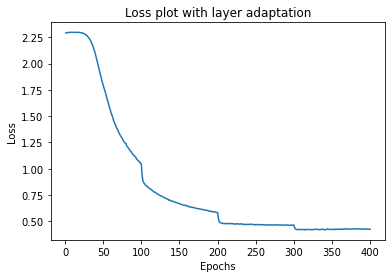

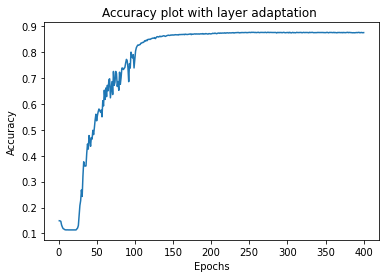

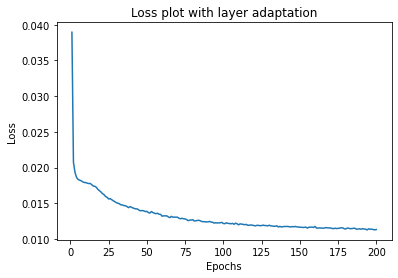

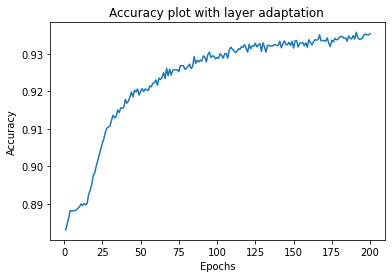

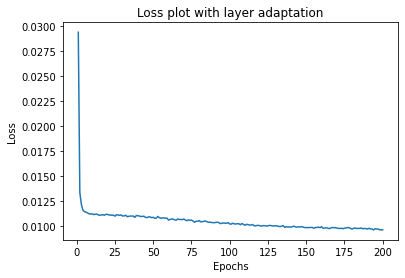

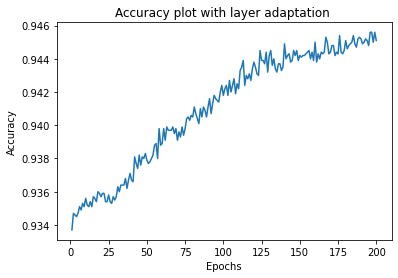

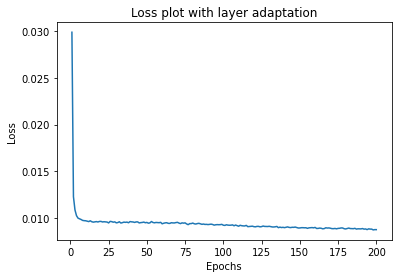

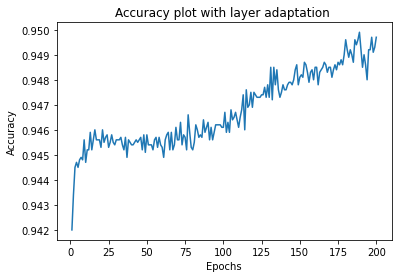

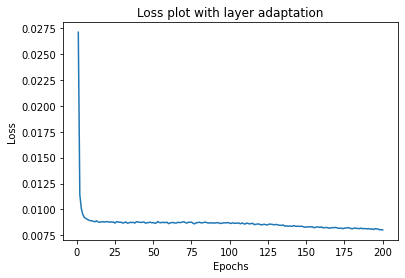

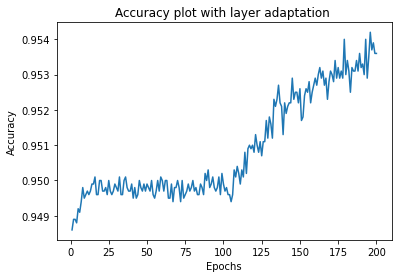

In [7]:
if __name__ == "__main__":     

    #=== Hyperparameters and Run Options ===#    
    hyperp = Hyperparameters()
    hyperp_new=Hyperparameters_new()
    run_options = RunOptions()
    

    #=== File Names ===#
    file_paths = FilePaths(hyperp, run_options)
    
    #=== Load Data ===#       
    data_train, labels_train,\
    data_test, labels_test,\
    data_input_shape, num_channels, label_dimensions\
    = load_data(file_paths.NN_type, file_paths.dataset, run_options.random_seed) 
    


    
    #for i in range(1,hyperp.num_networks):
    for i in range(6,9):
    #=== Initiate training ===#
        #trainer(hyperp, run_options, file_paths,i) 
        

    
            
        
        
        
        
            #=== GPU Settings ===#
        os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
        os.environ["CUDA_VISIBLE_DEVICES"] = run_options.which_gpu
    
            #=== Neural Network ===#
        if run_options.use_L1 == 0:
            kernel_regularizer = None
            bias_regularizer = None  
        else:
            kernel_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
            bias_regularizer = tf.keras.regularizers.l1(hyperp.regularization)

        data_train,new_label,labels_train=create_new(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,i)
        
        #=== Construct Validation Set and Batches ===# 
        data_and_labels_train, data_and_labels_val, data_and_labels_test,\
        num_data_train, num_data_val, num_data_test,\
        num_batches_train, num_batches_val, num_batches_test,data_and_labels_train_new\
        = form_train_val_test_batches(data_train, labels_train, \
                                  data_test, labels_test, \
                                  hyperp.batch_size, new_label, run_options.random_seed)
        
        
        if i==1:
            NN = FCLayerwise(hyperp, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer)    
        if i>1:
            kernel_regularizer = None
            bias_regularizer = None
            NN = FCLayerwise(hyperp_new, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer) 
    
    #=== Training ===#
    #                                 Training                                    #
###############################################################################

        if i==1:
            hyperp_n=hyperp
            optimize(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, accuracy_classification, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape)   
        
        if i>1:
            hyperp_n=Hyperparameters_new()
            optimize(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, accuracy_classification, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape)   
        
        
        
        if i==1:
            plot_fig(hyperp, run_options, file_paths,i)
            
        if i>1:
            plot_fig(hyperp_new, run_options, file_paths,i)
        
        

        
        
        
        
        
        
        
        

In [10]:
import random
random.randint(1,5)

3

In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets
kernel_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
bias_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
(data_train, labels_train), (data_test, labels_test) = datasets.cifar10.load_data()
#(data_train, labels_train), (data_test, labels_test) = datasets.mnist.load_data()
#data_train = tf.reshape(data_train, (len(data_train), 28*28))
#data_test = tf.reshape(data_test, (len(data_test), 28*28))
data_train = tf.reshape(data_train, (len(data_train), 32*32*3))
data_test = tf.reshape(data_test, (len(data_test), 32*32*3))
    
label_dimensions = 10
data_input_shape = data_train.shape[1:]

In [28]:
labels_train=np.squeeze(labels_train,axis=1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
Network=Final_Network(hyperp, run_options, data_input_shape, label_dimensions,
                      kernel_regularizer, bias_regularizer) 

ListWrapper([28, 10, 10, 10])


In [9]:
Network.load_weights("WEIGHTS"+'/'+"model_weights1")

In [10]:
(data_train, labels_train), (data_test, labels_test) = datasets.mnist.load_data()
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)
label_dimensions = 10
data_input_shape = data_train.shape[1:]

#=== Casting as float32 ===#
data_train = tf.cast(data_train,tf.float32)
labels_train = tf.cast(labels_train, tf.int32)
data_test = tf.cast(data_test, tf.float32)
labels_test = tf.cast(labels_test, tf.int32)
    
#=== Normalize Data ===#
data_train, data_test = data_train/255.0, data_test/255.0
data_train = tf.image.per_image_standardization(data_train) # Linearly scales each image to have mean 0 and variance 1
data_test = tf.image.per_image_standardization(data_test)   # Linearly scales each image to have mean 0 and variance 1

data_train = tf.reshape(data_train, (len(data_train), 28*28))
data_test = tf.reshape(data_test, (len(data_test), 28*28))

num_data_train = len(data_train)
num_data_test = len(data_test)
random_seed=1234
batch_size        = 1000

data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train)).shuffle(num_data_train, seed=random_seed)
data_and_labels_test = tf.data.Dataset.from_tensor_slices((data_test, labels_test)).batch(batch_size)
num_batches_test = len(list(data_and_labels_test))

#=== Partitioning Out Validation Set and Constructing Batches ===#
current_num_data_train = num_data_train
num_data_train = int(0.8 * num_data_train)
num_data_val = current_num_data_train - num_data_train
data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train)).shuffle(num_data_train, seed=random_seed)
data_and_labels_train = data_and_labels_train_full.take(num_data_train).batch(batch_size)
data_and_labels_val = data_and_labels_train_full.skip(num_data_train).batch(batch_size)    
num_batches_train = len(list(data_and_labels_train))
num_batches_val = len(list(data_and_labels_val))

In [23]:
(data_train, labels_train), (data_test, labels_test) = datasets.mnist.load_data()
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)
label_dimensions = 10
data_input_shape = data_train.shape[1:]

#=== Casting as float32 ===#
data_train = tf.cast(data_train,tf.float32)
labels_train = tf.cast(labels_train, tf.int32)
data_test = tf.cast(data_test, tf.float32)
labels_test = tf.cast(labels_test, tf.int32)
    
#=== Normalize Data ===#
data_train, data_test = data_train/255.0, data_test/255.0
data_train = tf.image.per_image_standardization(data_train) # Linearly scales each image to have mean 0 and variance 1
data_test = tf.image.per_image_standardization(data_test)   # Linearly scales each image to have mean 0 and variance 1

data_train = tf.reshape(data_train, (len(data_train), 28*28))
data_test = tf.reshape(data_test, (len(data_test), 28*28))

num_data_train = len(data_train)
num_data_test = len(data_test)
random_seed=1234
batch_size        = 1000

In [24]:
labels=tf.one_hot(tf.cast(labels_train,tf.int64), label_dimensions, dtype=tf.float32)

In [25]:
data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train,labels)).shuffle(num_data_train, seed=random_seed)

In [26]:
data_and_labels_train = data_and_labels_train_full.take(num_data_train).batch(batch_size)
data_and_labels_val = data_and_labels_train_full.skip(num_data_train).batch(batch_size)    
num_batches_train = len(list(data_and_labels_train))
num_batches_val = len(list(data_and_labels_val))

In [32]:
for batch_num, (batch_data_train, batch_labels_train,labels) in data_and_labels_train.enumerate():
    batch=batch_num
    batch_data_train = batch_data_train
    batch_labels_train=batch_labels_train
    lab=labels

In [36]:
lab


<tf.Tensor: shape=(1000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [20]:
y_true = tf.one_hot(tf.cast(labels_train,tf.int64), label_dimensions, dtype=tf.float32)

In [21]:
y_true

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [37]:
np.mean(tf.keras.losses.mean_squared_error(new_one, val[0:dimension[0]-1]))

1.9269863

array([4, 6, 6, ..., 7, 2, 5])

In [19]:

x_train_new = batch_data_train[batch_labels_train == 1]
batch_pred_train,val=NN(x_train_new)



In [16]:
y_true = tf.one_hot(tf.cast(y_true,tf.int64), label_dimensions, dtype=tf.float32)

In [45]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.6097095>

In [48]:
np.linalg.norm(val[0]-val[1])

2.567157